In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from src import drawing_functions

# choice of colors for the four pairs:
colors={}

colors['physics']='#c73b0b'
colors['052012-theoretical-physics']='#c73b0b'

colors['economics']='#e7a136'
colors['052012economics']='#e7a136'

colors['astronomy']='#978e43'
colors['052012astronomy']='#978e43'

colors['literature']='#731115'
colors['052012-literature']='#731115'

#define path to save figures
save_path = "data/figures/"
os.makedirs(save_path, exist_ok=True)

In [2]:
# load dataframe for figures

folder_path = 'data/processed data/'
# all four pairs of communities:
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

# dictionaries to keep dataframes for all communities:
data_questions = {}
data_rep_agg = {}
data_nets = {}
data_coreper = {}

for comm in communities:
    # active questions data
    data_questions[comm] = pd.read_csv(folder_path+'active questions/%s_weekly_active_questions.csv'%(comm))
    # aggragated data about dynamical reputations:
    data_rep_agg[comm] = pd.read_csv(folder_path+'%s_dynamic_reputation_aggregates.csv'%(comm))
    # interaction networks + dynamical reputations data:
    data_nets[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_networks_features.csv'%(comm))
    # core periphery data:
    data_coreper[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_core_periphery_features.csv'%(comm))

## Fig 2

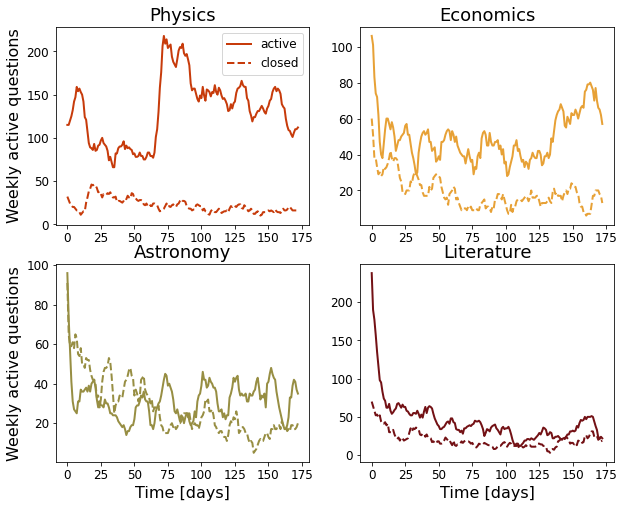

In [3]:
drawing_functions.single_variable_plot_square(data_questions,'Number_of_active_questions',colors, 'Weekly active questions')

plt.savefig(save_path+'Fig2.pdf', dpi=300, bbox_inches='tight')

## Fig 3

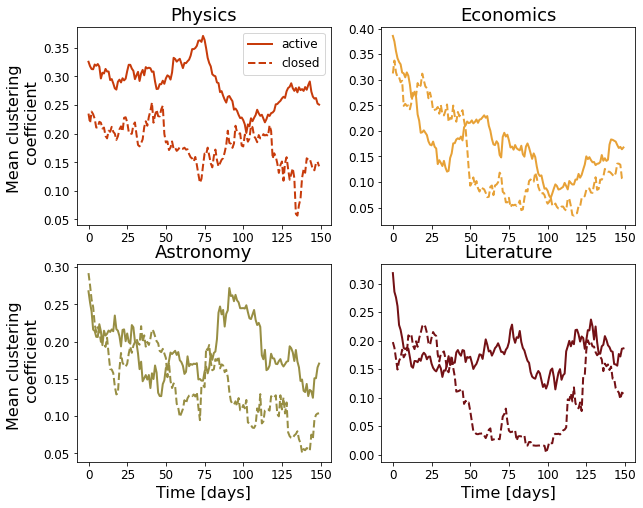

In [4]:
drawing_functions.single_variable_plot_square(data_nets,'Clustering_coef',colors, 'Mean clustering \n coefficient')
plt.savefig(save_path+'Fig3.pdf', dpi=300, bbox_inches='tight')

## Fig 4

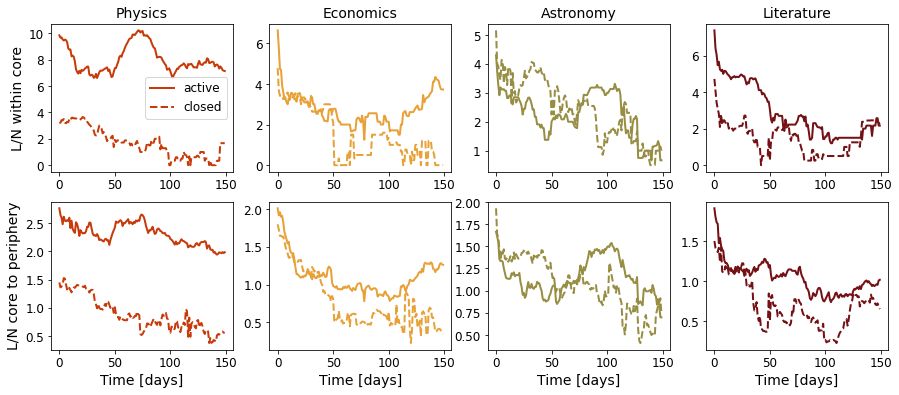

In [5]:
drawing_functions.two_vars_plot_rows(data_coreper,'LN_core','LN_core_periphery',colors,'L/N within core','L/N core to periphery')
plt.savefig(save_path+'Fig4.pdf', dpi=300, bbox_inches='tight')

## Fig 5

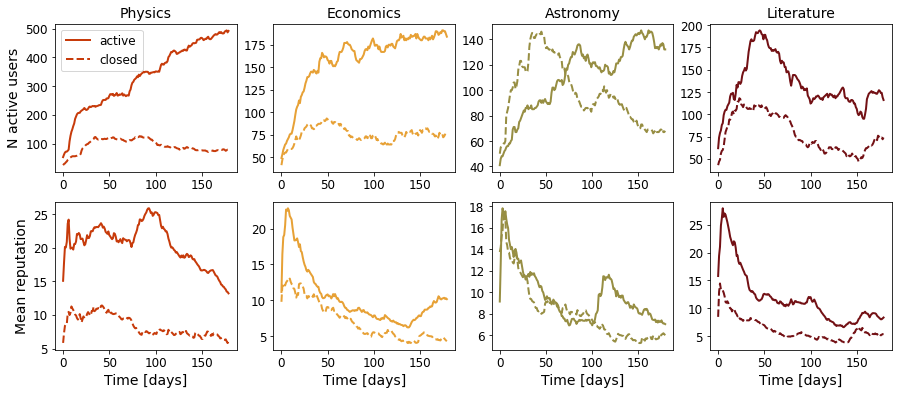

In [6]:
drawing_functions.two_vars_plot_rows(data_rep_agg,'Number of active users','Mean user reputation',colors,'N active users','Mean reputation')
plt.savefig(save_path+'Fig5.pdf', dpi=300, bbox_inches='tight')

## Fig 6

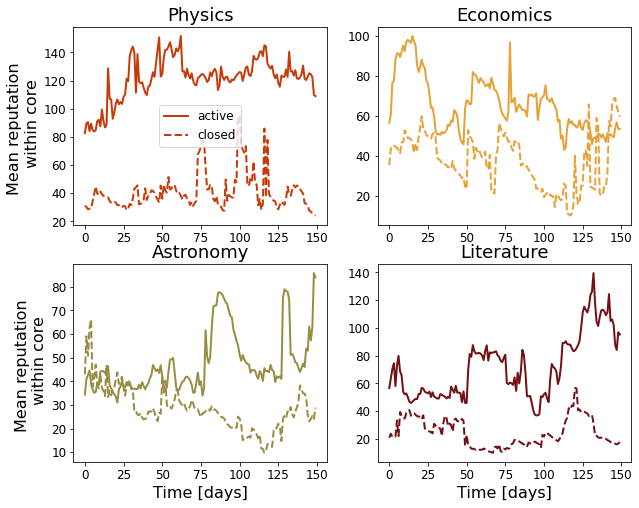

In [7]:
drawing_functions.single_variable_plot_square(data_coreper,'Mean_dr_core',colors, 'Mean reputation \n within core')
plt.savefig(save_path+'Fig6.pdf', dpi=300, bbox_inches='tight')

# Supplementary

## Core-periphery structure - model robustness

### Fig A1 - Stability of the core-periphery algorithm

<Figure size 432x288 with 0 Axes>

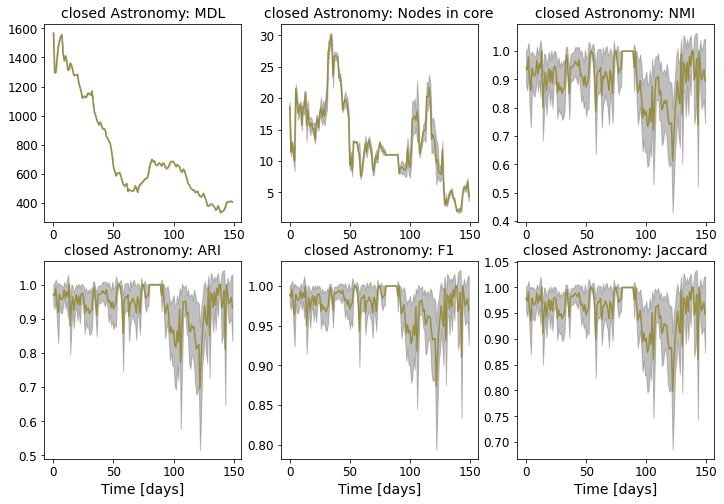

In [8]:
folder_path = "data/processed data/core-periphery_ens_statistics/"
community = "052012astronomy"
properties = ["mdl", "nodes_in_core", "nmi", "ari", "f1", "jacc"]

data = {}
for prop in properties:
    data[prop] = pd.read_csv(folder_path+'%s_%s.csv'%(community, prop), index_col=0)
    
drawing_functions.plot_ensemble_statistics(data, colors)
plt.savefig(save_path+'FigA1.pdf', dpi=300, bbox_inches='tight')

## Dynamic reputation - model description

### Fig A2 
- Dependence of $\beta$ and number of days needed to reputation drops below beseline reputation due to user inactivity
- The evolution of single user reputation for different model parameters

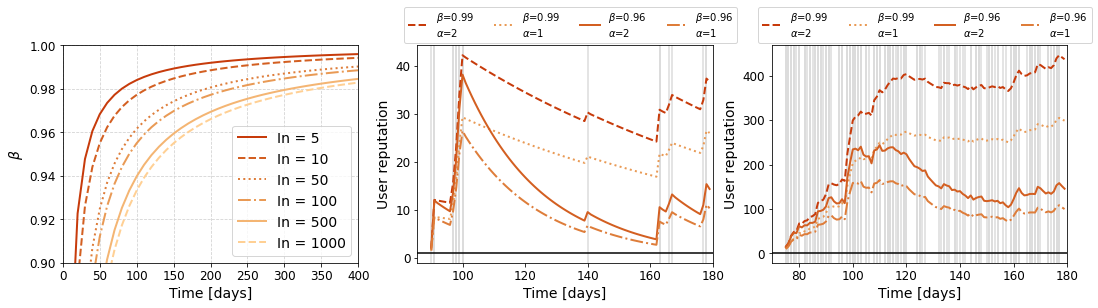

In [9]:
import src.dynamical_reputation as dr

def prepare_data(name, ltlim, htlim, reputation, path):
    
    qa = pd.read_csv('%s/%s_interactions_questions_answers.csv'%(path,name)) #questions-answers
    comm = pd.read_csv('%s/%s_interactions_comments.csv'%(path, name)) # comments
    acc = pd.read_csv('%s/%s_interactions_acc_answers.csv'%(path,name)) # accepted answers
    q = pd.read_csv('%s/%s_interactions_post_questions.csv'%(path, name)) # posted questions
    
    data = dr.merge_interactions (qa, comm, acc, q,  ltlim, htlim, reputation)
    return data    
    
def get_data(net, user):
    
    #define different beta parameters for reputation lines 
    beta_alpha_params = [[0.99,2], [0.99,1], [0.96,2], [0.96,1] ]

    data_path = "./data/interactions/%s/"%net
    rep_path = './data/reputations/'

    data_dict = {}

    #for single user save interactions
    data = prepare_data(net, 0, 180, 'eng', data_path)
    t = data[data['UserId']==user].sort_values(by='Time')['days']
    data_dict["ts"] = t

    for b, a in beta_alpha_params:
        rep_file = rep_path+'/%s_first_180_days_eng_reputation_beta%s_alpha%s.csv'%(net, b, a)
        rep = pd.read_csv(rep_file, index_col=0).T[user]
        urep = [(i, rep[i]) for i in range(0,180) if rep[i]>0 ]
        data_dict[(b,a)] = urep
        
    return data_dict
    

plt.figure(figsize = (18,4))

#plot the reputation decay
plt.subplot(1,3,1)
drawing_functions.plot_reputation_decay()

# plot the dynamical reputation of single user for differnt model parameters
plt.subplot(1,3,2)
data_dict = get_data("physics", 1696.)
drawing_functions.plot_single_user_reputation(data_dict)

plt.subplot(1,3,3)
data_dict = get_data("physics", 1390.)
drawing_functions.plot_single_user_reputation(data_dict)

plt.savefig(save_path+'FigA2.pdf', dpi=300, bbox_inches='tight')

## Popular/casual users

### Fig A3 - popular/casual users

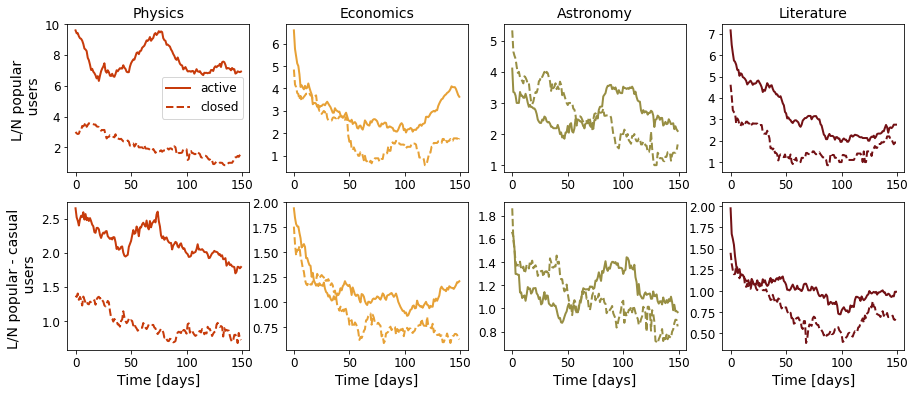

In [10]:
# load dataframe for figures

folder_path = 'data/processed data/'
# all four pairs of communities:
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

# dictionaries to keep dataframes for all communities:
data_pop = {}

for comm in communities:
    # popular casual users
    data_pop[comm] = pd.read_csv(folder_path+'propopular_users/%s_popular_casual_users.csv'%(comm))


drawing_functions.two_vars_plot_rows(data_pop,
                                     'popular_lpn','mix_lpn',colors,'L/N popular \n users','L/N popular - casual \n users')
plt.savefig(save_path+'FigA3.pdf', dpi=300, bbox_inches='tight')

## Core size stability

### Fig A4 - size of the core 

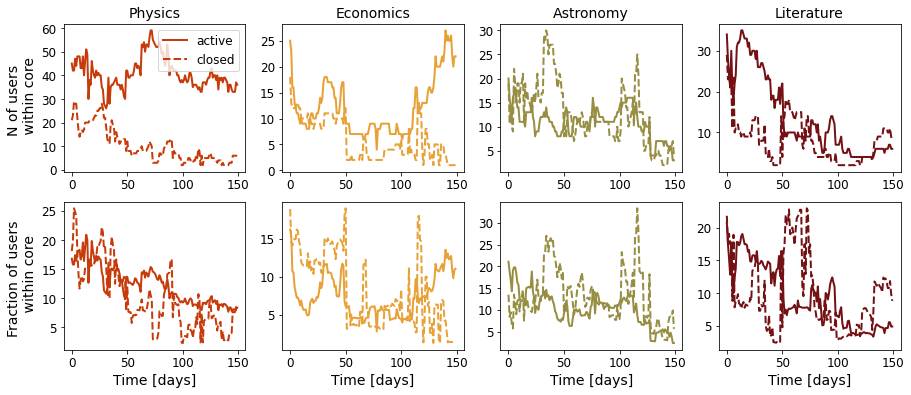

In [11]:
drawing_functions.two_vars_plot_rows(data_coreper,'N_core','Frac_core',colors,'N of users \n within core','Fraction of users \n within core')
plt.savefig(save_path+'FigA4.pdf', dpi=300, bbox_inches='tight')

### Fig A5 - Jaccard index between cores in different time steps

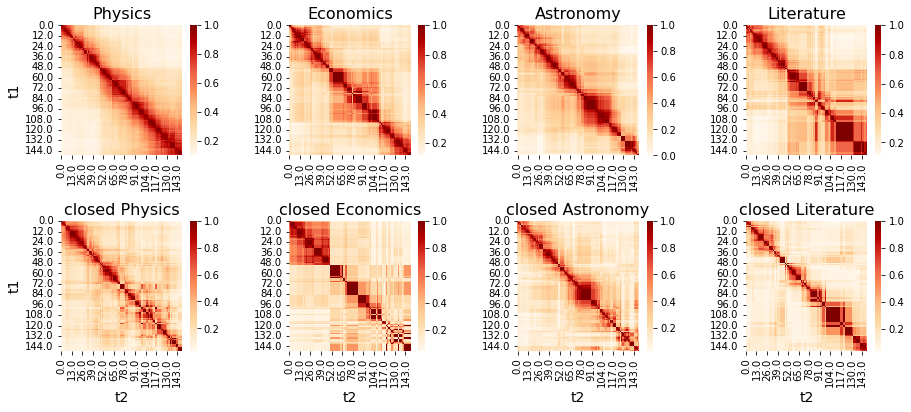

In [12]:
folder_path = 'data/processed data/jaccard/'
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

data = {}
for comm in communities:
    data[comm] = pd.read_csv(folder_path+"%s_jaccard.csv"%comm)
    

drawing_functions.plot_jaccard_heatmap(data, "OrRd")
plt.savefig(save_path+'FigA5.pdf', dpi=300, bbox_inches='tight')

### Fig A6 - Jaccard index between cores in different time steps

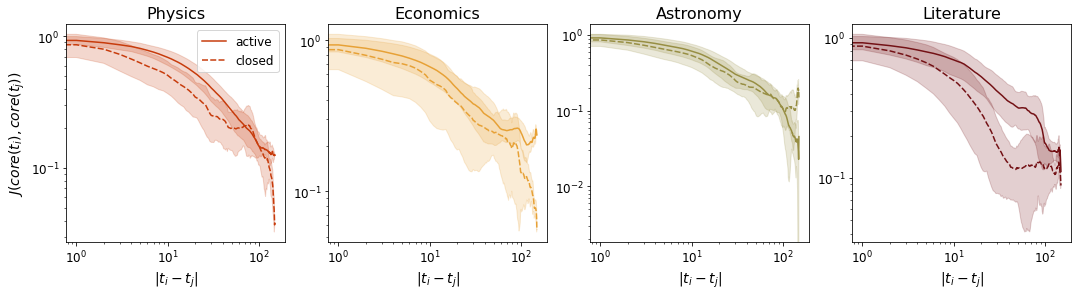

In [13]:
folder_path = 'data/processed data/jaccard/'
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

data = {}
for comm in communities:
    data[comm] = pd.read_csv(folder_path+"%s_jaccard_time_delta.csv"%comm)
    
drawing_functions.plot_jaccard(data, colors)
plt.savefig(save_path+'FigA6.pdf', dpi=300, bbox_inches='tight')

## Dynamic reputation in the network of interaction

### Fig A7 - ration between core and periphery dyn. reputation

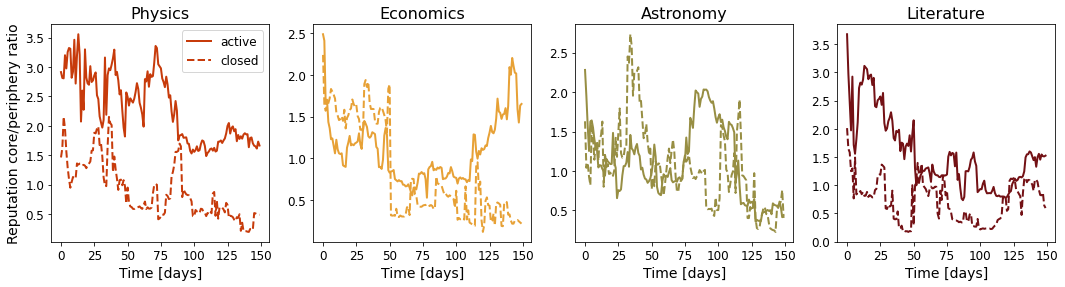

In [14]:
drawing_functions.single_variable_plot_row(data_coreper,'DynRep_core_per_ratio',colors, 'Reputation core/periphery ratio')
plt.savefig(save_path+'FigA7.pdf', dpi=300, bbox_inches='tight')

### Fig A8 - Gini coef of dynamical reputation among users

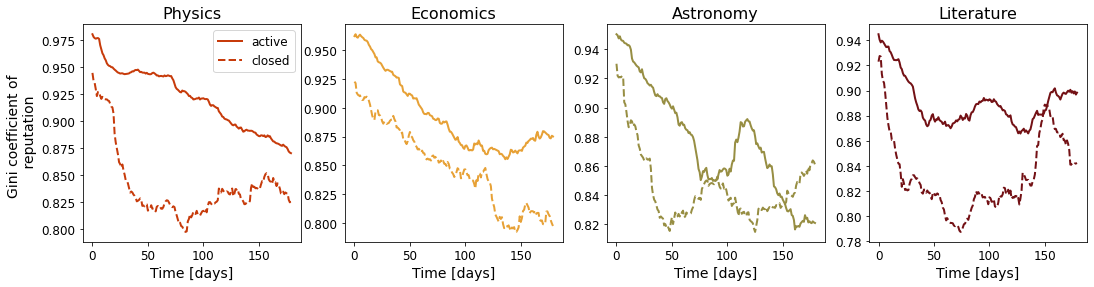

In [15]:
drawing_functions.single_variable_plot_row(data_rep_agg,'Gini coefficient',colors, 'Gini coefficient of \n reputation')
plt.savefig(save_path+'FigA8.pdf', dpi=300, bbox_inches='tight')

### Fig A9 - Dynamical reputation assortativity

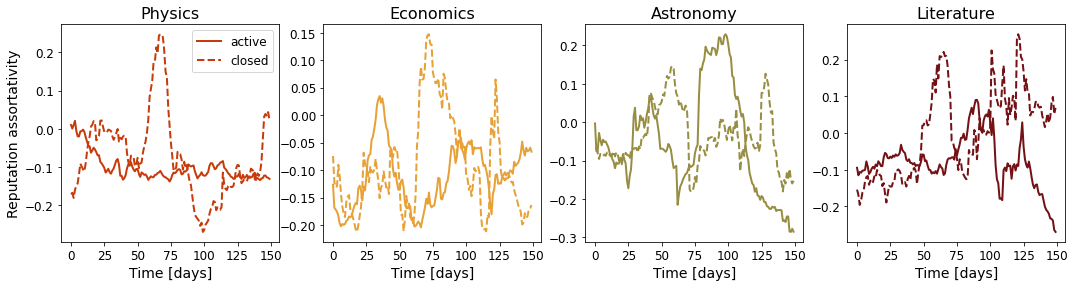

In [16]:
drawing_functions.single_variable_plot_row(data_nets,'DynRep_Assortativity',colors, 'Reputation assortativity')
plt.savefig(save_path+'FigA9.pdf', dpi=300, bbox_inches='tight')

### Fig A10 - Correlations between users degree and betwenness centrality


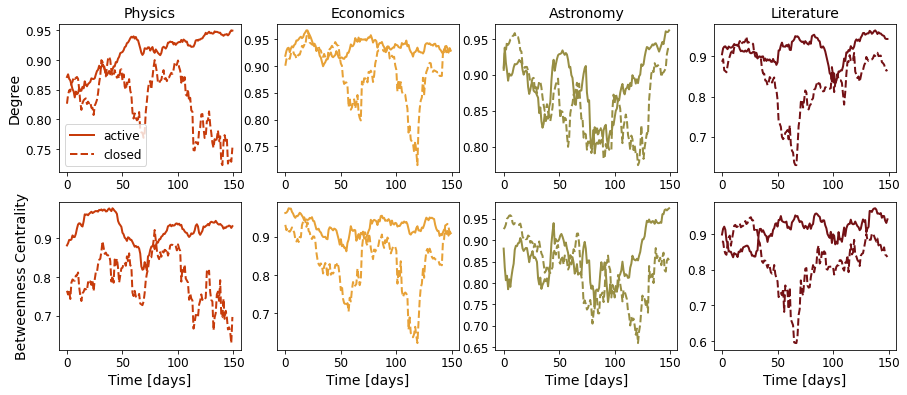

In [17]:
drawing_functions.two_vars_plot_rows(data_nets,'DynRep_Degree_corr','DynRep_BC_corr',colors,'Degree','Betweenness Centrality')
plt.savefig(save_path+'FigA10.pdf', dpi=300, bbox_inches='tight')

## The sliding window 

### Fig A11 - The network and core periphery properties for different sliding windows $\tau$

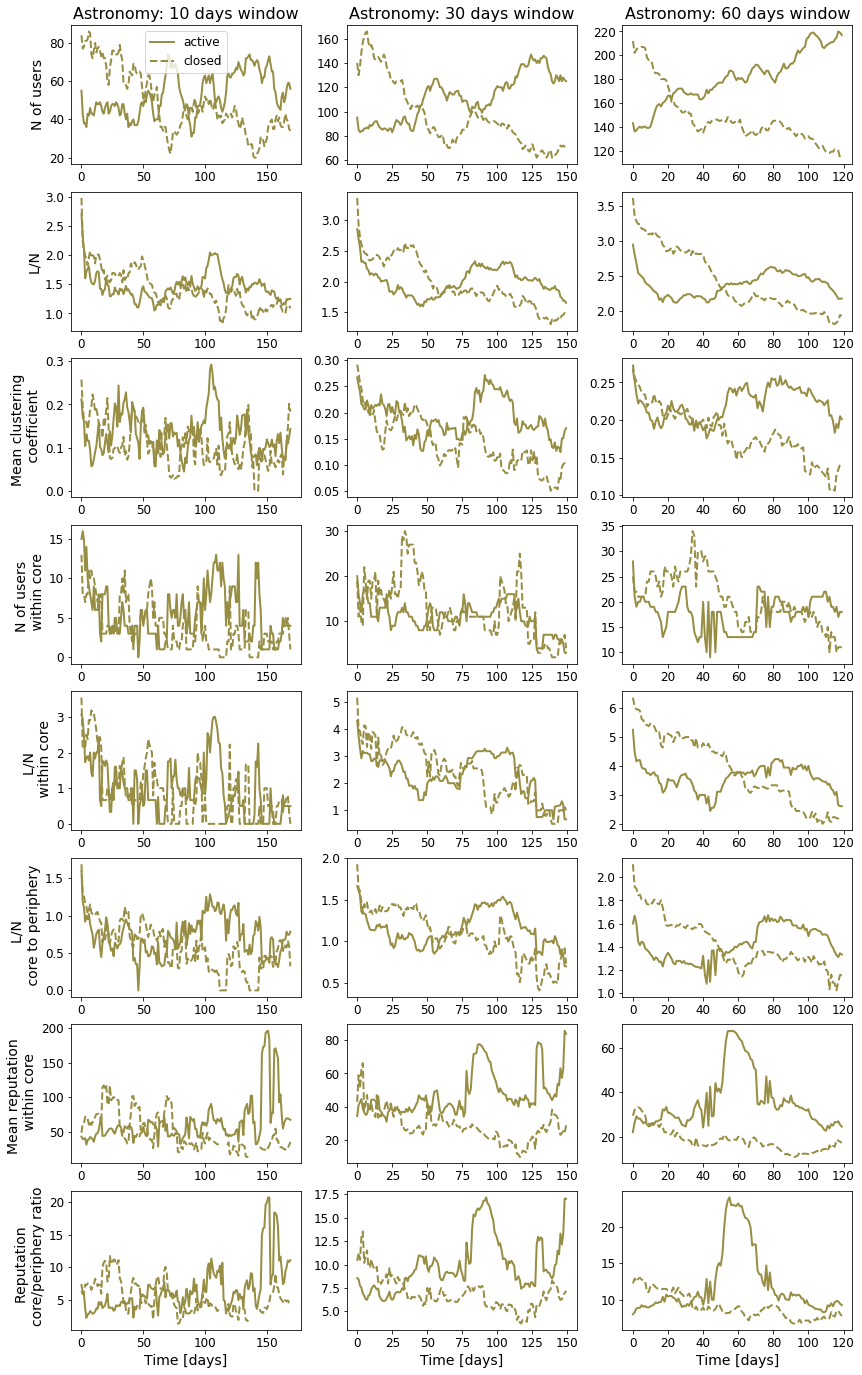

In [18]:
path =  "data/processed data/network_properties_window/"
data = {}
for window in [10, 30, 60]:
    data[window]={}
    for comm in ["astronomy", "052012astronomy"]:
        data[window][comm] = pd.read_csv( path+"%s_network_properties_window%s.csv"%(comm, window))
        

columns_order = [10, 30, 60]
row_order = ["N_nodes", "L/N", "clustering", "N_core", "L/N_core", "L/N_core_per", "mean_core_dr", "mean_core/per_dr"]

ylab_order = ["N of users", "L/N", "Mean clustering \n coefficient", "N of users \n within core", "L/N \n within core", "L/N  \n core to periphery",
              "Mean reputation \n within core", "Reputation  \n  core/periphery ratio"]
drawing_functions.plot_compare_tw(data, columns_order, row_order, colors, ylab_order)
plt.savefig(save_path+'FigA11.pdf', dpi=300, bbox_inches='tight')

## The choice of model parameters

### Fig A12 - RMSE between number of users in the sliding window od 30 days and users with reputation higher than 1 for different $\beta$

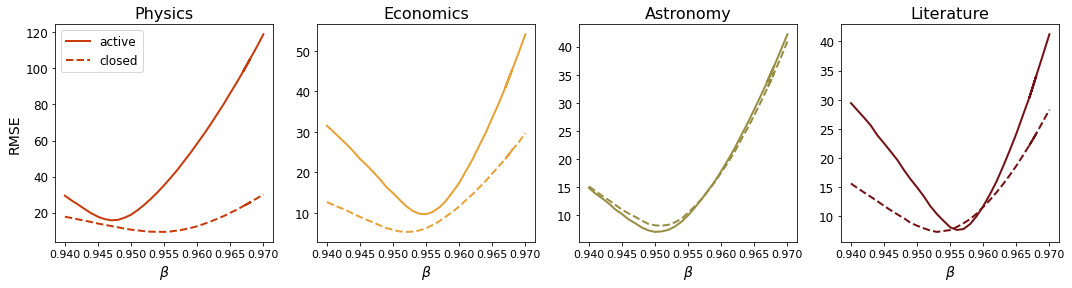

In [19]:
# load dataframe for figures

folder_path = "data/processed data/RMSE/"
# all four pairs of communities:
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

data_rmse = {}
for comm in communities:
    data_rmse[comm] = pd.read_csv(folder_path+"rmse_%s.csv"%comm)
    
drawing_functions.single_variable_plot_row(data_rmse,"RMSE",colors, 'RMSE', x_label=r"$\beta$", x_column_name="Beta", xticks_size=11)
plt.savefig(save_path+'FigA12.pdf', dpi=300, bbox_inches='tight')

### Fig A13 - Number of users with dynamic reputation higher than 1 for $\beta=0.96$ and $\beta$ which provide the best fit

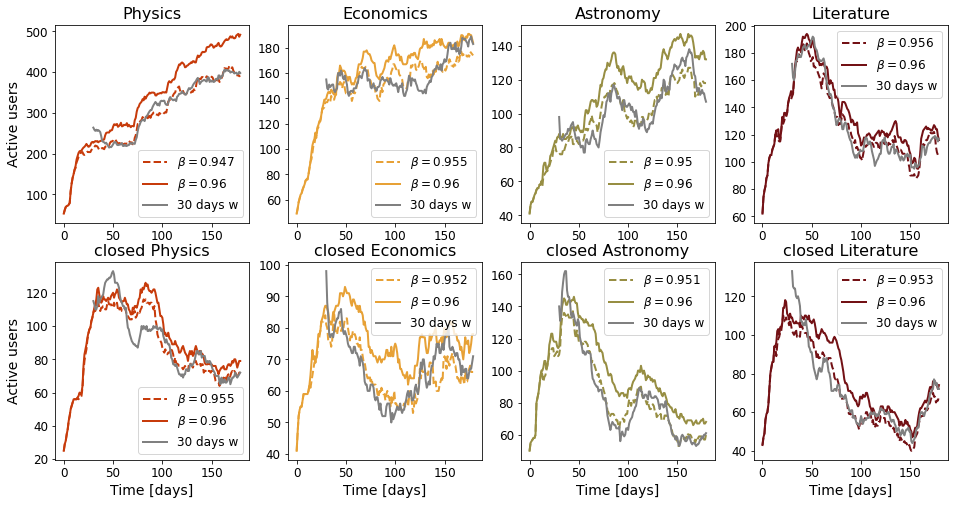

In [20]:
from src.data_processing_functions import Nusers_sw, prepare_data

data={}
parameters = [
    ['052012astronomy', 0.951], ['052012economics',  0.952], ['052012-literature',  0.953], ['052012-theoretical-physics',  0.955], 
    ['astronomy',  0.95], ['economics',  0.955], ['literature',  0.956], ['physics',  0.947], ]

for community, b in parameters:
    data[community] = {}
    
    data[community][b] = ((pd.read_csv('data/reputations/%s_first_180_days_eng_reputation_beta%s.csv'%(community, b), index_col=0))>1).sum()
    data[community][0.96] = ((pd.read_csv('data/reputations/%s_first_180_days_eng_reputation_beta%s.csv'%(community, 0.96), index_col=0))>1).sum()
    U = Nusers_sw(prepare_data(community, 0, 180, 'eng', "data/interactions/%s/"%community), 180, 30) # data, end time, window
    data[community]["window"] = U

drawing_functions.plot_active_users_beta(data, colors)
plt.savefig(save_path+'FigA13.pdf', dpi=300, bbox_inches='tight')

### Fig A14 - Number of users who had activity in current and the following windows (permanent users), and number of users with reputation higher than 1 (reputation users) 

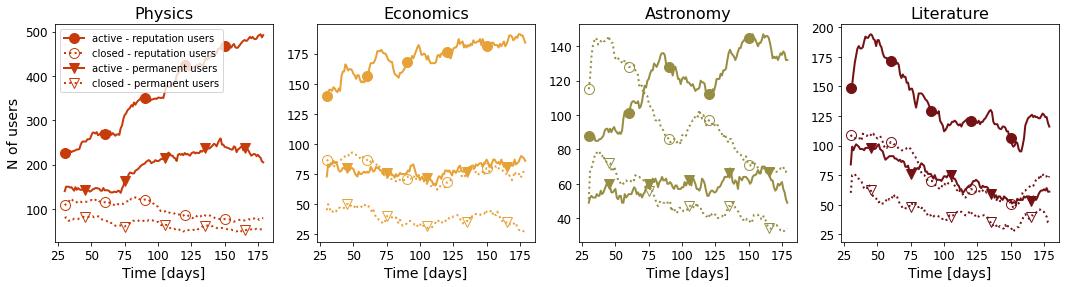

In [21]:
from src.data_processing_functions import users_who_were_stay_active


folder_path = 'data/processed data/users_activity/'
communities = ['astronomy','economics','literature','physics',
               '052012astronomy','052012economics','052012-literature','052012-theoretical-physics']

data = {}
for comm in communities:
    user_time = pd.read_csv(folder_path+'%s_%s_%s.csv'%(comm, 0, 180))
    tp = users_who_were_stay_active(user_time, 30)
    df1 = pd.DataFrame(tp, columns=["Days", "perNusers",])
    df1["Days"]=df1['Days'].astype(int)
    active = ((pd.read_csv('data/reputations/%s_first_180_days_eng_reputation_beta%s.csv'%(comm, 0.96), index_col=0))>1).sum()[30:]
    df2 = active.to_frame().reset_index().rename(columns={"index":"Days", 0:"Active users"})
    df2["Days"]=df2['Days'].astype(int)
    data[comm] = pd.merge(df1, df2)

drawing_functions.two_variable_plot_one_row(data, "Active users", "perNusers", colors, 'N of users', x_column_name="Days")
plt.savefig(save_path+'FigA14.pdf', dpi=300, bbox_inches='tight')